- Welcome to my first project in NLP. With zero experience in Data Science and machine learning, here is my work that I am proud of, if you are a student, I hope you find guidance.

# NLP With Hotel Review

We are tasked with helping Hotel Management Inc. better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. For this analysis, you are provided with a large data set consisting of hotel reviews (text fields for positive and negative comments) and details about the stay (hotel location, time & length of stay, etc). Your target column of interest is Reviewer_Score that encodes positive sentiment as 1 and negative as 0.

- Natural Language Processing (NLP) in Python is like teaching a computer to understand human language, just like how we communicate with each other. Think of it as a way for computers to read, understand, and generate human language. Here's a simple breakdown:

In Python, there are libraries like NLTK (Natural Language Toolkit) and spaCy that provide tools and functions to perform these tasks easily. So, NLP in Python is all about making computers understand and work with human language, which can be incredibly useful in many different applications.

# Dictionary of the columns from the data for the NLP Hotel Review project

   I am not adding all my columns to the dictionary because not all of them are necessary.

Concepts:

1. **Average_Score**: The mean or average rating given to a hotel based on all the reviews it has received.

2. **Negative_Review**: A textual description or comment highlighting aspects of dissatisfaction or criticism about the hotel experience.

3. **Review_Total_Negative_Word_Counts**: The total count of negative words present in the negative review.

4. **Total_Number_of_Reviews**: The total number of reviews received by the hotel.

5. **Positive_Review**: A textual description or comment highlighting aspects of satisfaction or positive experiences about the hotel.

6. **Review_Total_Positive_Word_Counts**: The total count of positive words present in the positive review.

7. **Total_Number_of_Reviews_Reviewer_Has_Given**: The total number of reviews the particular reviewer has given across all hotels.

8. **Reviewer_Score**: The rating given by the reviewer for their hotel experience.

9. **Days_Since_Review**: The number of days that have passed since the review was posted.

10. **Latitude**: The geographical coordinate that specifies the north-south position of a point on the Earth's surface.

11. **Longitude**: The geographical coordinate that specifies the east-west position of a point on the Earth's surface.

12. **Day**: The day component of the date when the review was posted.


## 1. Exploratory Data Analysis

- Perform EDA on the data and mention 3-4 observations from which you can draw actionable insights. In your EDA, you may consider creating a data dictionary, basic statistical analysis, data visualizations, data cleaning and preprocessing to prepare the data for modeling.

- Importing libraries first, super important.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Uploading my data from the CSV file.

In [11]:
df = pd.read_csv('Hotel_Reviews.csv')

- Checking data frame, first glance, just 3 rows to reduce space.

In [12]:
df.head(3)

Unnamed: 0  Additional_Number_of_Scoring  Average_Score  \
0           0                           194            7.7   
1           1                           194            7.7   
2           2                           194            7.7   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  ...  \
0                                           7               0  ...   
1                                           7               0  ...   
2                                           9               0  ...   

   Reviewer_Nationality_USA  Reviewer_Nationality_Other  \
0                         0                           1   
1                         0                           0   
2                         0                           0   

   Hotel_Address_Amsterdam  Hotel_Address_Barcelona  Hotel_Address_London  \
0                        1                        0                     0   
1                        1                        0                     0   
2                        1                        0                     0   

   Hotel_Address_Milan  Hotel_Address_Paris  Hotel_Address_Vienna  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   

   Leisure_Trip  Nights_Stayed  
0             1              6  
1             1              4  
2             1              3  

[3 rows x 30 columns]

- Unnamed: 0 is not a usefull column, so I will drop it now. 

In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

- Making sure I deleted Unnamed: 0

In [14]:
df.head(3)

Additional_Number_of_Scoring  Average_Score  \
0                           194            7.7   
1                           194            7.7   
2                           194            7.7   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               0   
1                                           7               0   
2                                           9               0   

   Days_Since_Review  ...  Reviewer_Nationality_USA  \
0                  0  ...                         0   
1                  0  ...                         0   
2                  3  ...                         0   

   Reviewer_Nationality_Other  Hotel_Address_Amsterdam  \
0                           1                        1   
1                           0                        1   
2                           0                        1   

   Hotel_Address_Barcelona  Hotel_Address_London  Hotel_Address_Milan  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   

   Hotel_Address_Paris  Hotel_Address_Vienna  Leisure_Trip  Nights_Stayed  
0                    0                     0             1              6  
1                    0                     0             1              4  
2                    0                     0             1              3  

[3 rows x 29 columns]

- Checking numbers of columns and rows, 515738 rows and 29 columns.

In [15]:
df.shape

(515738, 29)

- I like more df.info( ) to see all the columns NAMES in a compacted space and also to check Dtypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

- Describe compute basic summary statistics to understand the distribution of NUMERICAL features.

In [17]:
df.describe()

Additional_Number_of_Scoring  Average_Score  \
count                 515738.000000  515738.000000   
mean                     498.081836       8.397487   
std                      500.538467       0.548048   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      341.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                            29.690831              2317.464868   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3613.000000   
max                           408.000000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      515738.000000   
mean                           17.776458   
std                            21.804185   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               515738.000000   515738.000000   
mean                                     7.166001        0.570006   
std                                     11.040228        0.495075   
min                                      1.000000        0.000000   
25%                                      1.000000        0.000000   
50%                                      3.000000        1.000000   
75%                                      8.000000        1.000000   
max                                    355.000000        1.000000   

       Days_Since_Review       Latitude      Longitude  ...  \
count      515738.000000  515738.000000  515738.000000  ...   
mean          354.441932      49.432419       2.893479  ...   
std           208.928124       3.460237       4.667477  ...   
min             0.000000      41.328376      -0.369758  ...   
25%           175.000000      48.214066      -0.143372  ...   
50%           353.000000      51.499981       0.019886  ...   
75%           527.000000      51.516288       4.841163  ...   
max           730.000000      52.400181      16.429233  ...   

       Reviewer_Nationality_USA  Reviewer_Nationality_Other  \
count             515738.000000               515738.000000   
mean                   0.068711                    0.365121   
std                    0.252963                    0.481465   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    1.000000                    1.000000   

       Hotel_Address_Amsterdam  Hotel_Address_Barcelona  Hotel_Address_London  \
count            515738.000000            515738.000000         515738.000000   
mean                  0.110936                 0.116627              0.508594   
std                   0.314053                 0.320976              0.499927   
min                   0.000000                 0.000000              0.000000   
25%                   0.000000                 0.000000              0.000000   
50%                   0.000000                 0.000000              1.000000   
75%                   0.000000                 0.000000              1.000000   
max                   1.000000                 1.000000              1.000000   

       Hotel_

- All rows meaning are clear, but for beginners std row represents the standard deviation of each column. Standard deviation is a measure of the amount of variation or dispersion in a set of values. A low standard deviation means the values tend to be close to the mean, while a high standard deviation means the values are spread out over a wider range.

- A standard deviation of 0.548048 is considered relatively low if the mean of the data is 8.397487.

The interpretation of whether a standard deviation is low or high depends on the context of the data. In some datasets, a standard deviation of 0.548048 might be considered high if the mean is very close to zero. However, in your case, with a mean of 8.397487, a standard deviation of 0.548048 indicates that the values are relatively close to the mean.

In general, a standard deviation closer to zero indicates that the values in the dataset are closer to the mean, while a larger standard deviation indicates that the values are more spread out from the mean. So, in this context, 0.548048 would be considered a relatively low standard deviation.

- Now checking for nulls. Nulls are missing values on a data set/frame.

In [18]:
df.isnull().sum()

Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_Other              

## Correlation Analysis

- calculating the correlation matrix. We can only do this with numerical values.

<Axes: >

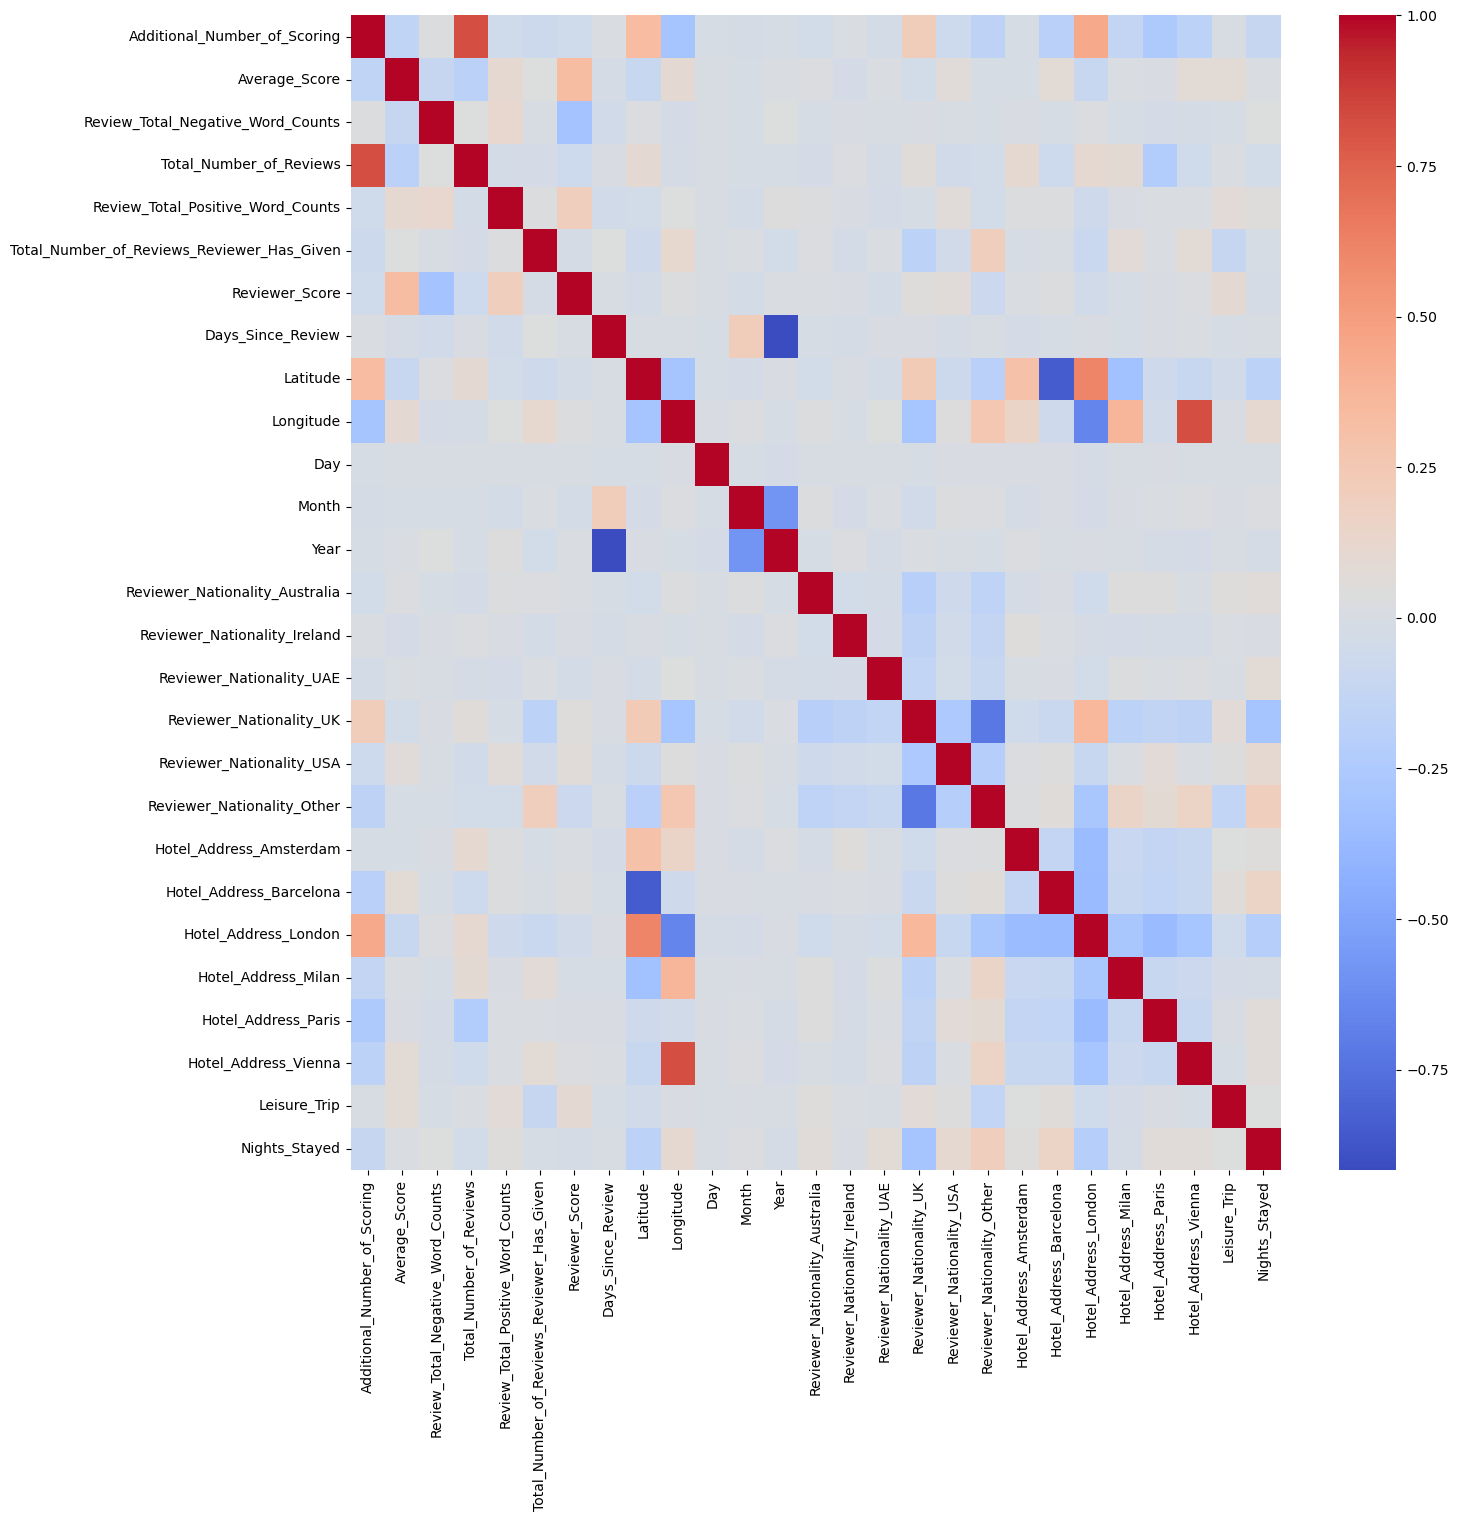

In [19]:
# Only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# # Plot heatmap
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
sns.heatmap(numerical_df.corr(numeric_only=True),annot=False,cmap='coolwarm',ax=ax)

- Had a problem that I was not able to see the Correlation Matrix values, I had a hard time with the bug fixing, I tried updating my dependency but it did not help to see a correlation about features, I requested my peer to provide me a correlation matrix, which I am attaching below.

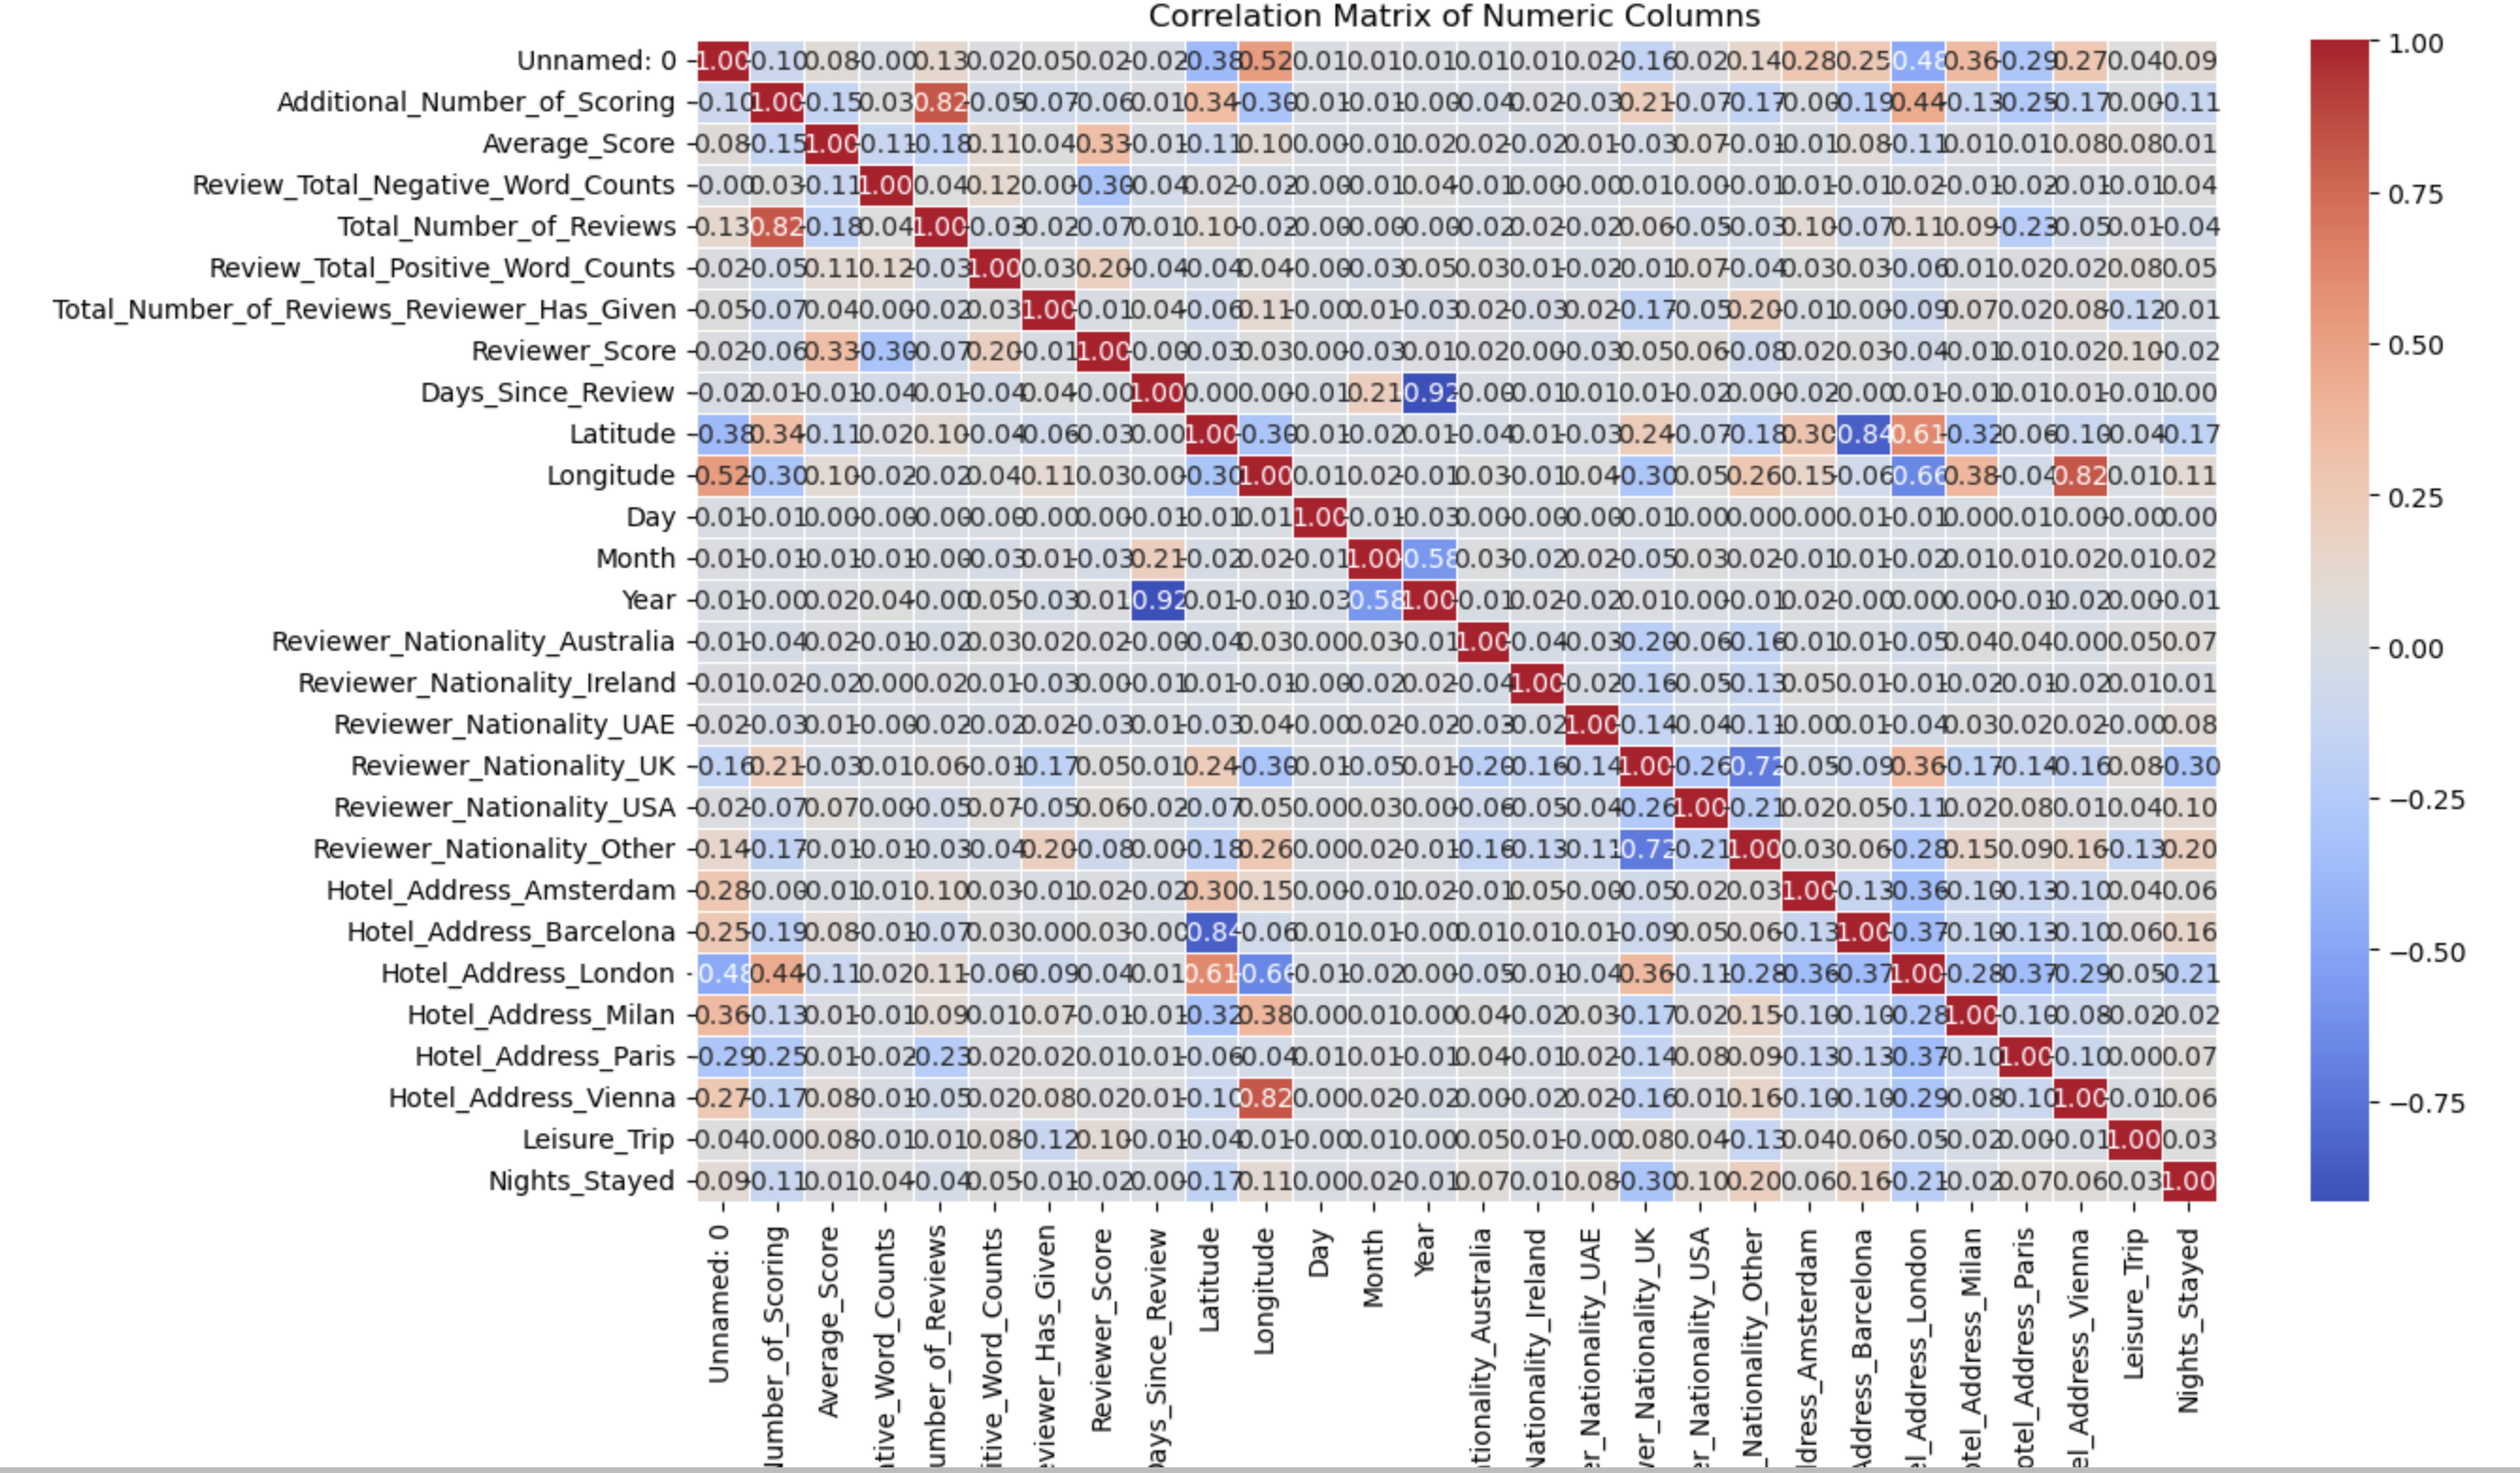

In [20]:
from IPython import display
display.Image('Sarmad_corr.png')

## Explanation of the colors in the heatmap

In the heatmap generated from the correlation matrix, the colors represent the strength and direction of the correlation between pairs of variables.

- Red squares: These indicate a POSITIVE correlation between the variables. It means that as one variable increases, the other tends to increase as well. The darker the red color, the stronger the positive correlation.

- Blue squares: These indicate a NEGATIVE correlation between the variables. It means that as one variable increases, the other tends to decrease. The darker the blue color, the stronger the negative correlation.

- White squares: These typically represent NO correlation, meaning there is little to no linear relationship between the variables.

So, the colors in the heatmap provide a visual representation of how variables are related to each other within your dataset.

# Distribution Analysis

- Plot histograms to visualize the distribution of numerical features.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


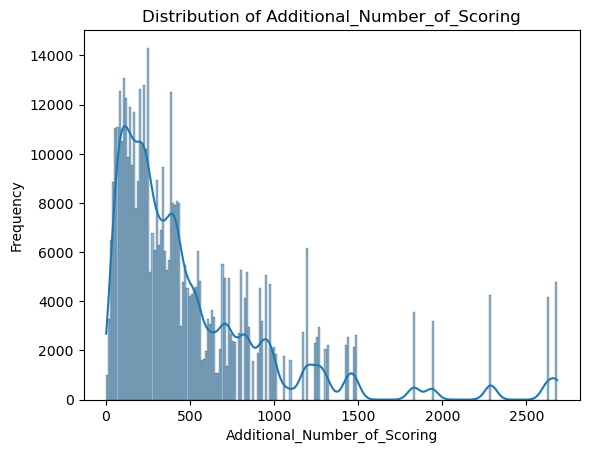

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


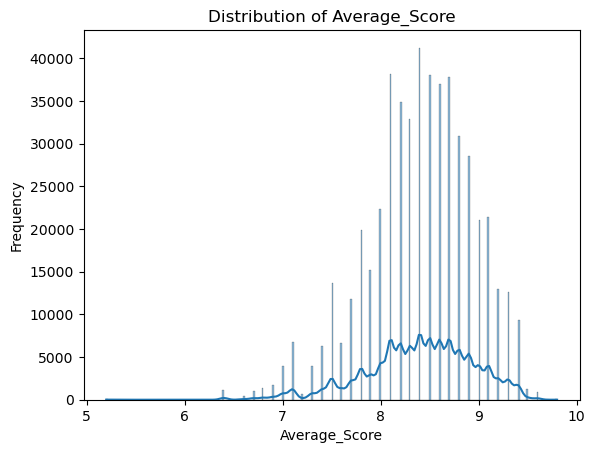

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


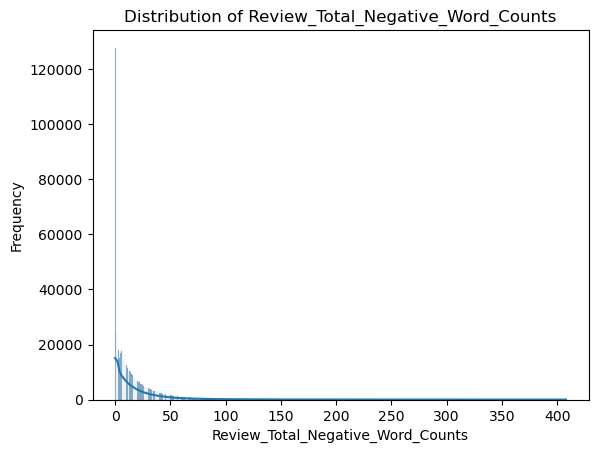

In [96]:
# Set the number of numerical columns to visualize to 3 to keep the output manageable
num_cols_to_visualize = 3  # Adjust this number as needed

# Select the first n numerical columns to visualize
numerical_columns = [column for column in df.columns if df[column].dtype != 'object'][:num_cols_to_visualize]

# Visualize selected numerical columns
for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Data cleaning

Import the library for basic text manipulation, you'll typically need only the re (regular expressions) library. And string.

In [21]:
import re
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
# this is a string example = "this is a Big big sentence"
example = "this is a Big big sentence"
example.lower().split()

['this', 'is', 'a', 'big', 'big', 'sentence']

In [23]:
print(example)

this is a Big big sentence


In [24]:
# Doing a function to do data cleaning. I am Spliting for purporse of cleaning. This is a not split words. 
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation (Punctuation is a tool from string library), each review is string of words. Using a loop.
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove non-alphanumeric characters (isspace is a building method from Python)
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    return text

In [25]:
df['Positive_Review'] = df['Positive_Review'].apply(clean_text)

In [26]:
df['Negative_Review'] = df['Negative_Review'].apply(clean_text)

In [27]:
df['Positive_Review'].head()

0     only the park outside of the hotel was beauti...
1     no real complaints the hotel was great great ...
2     location was good and staff were ok it is cut...
3     great location in nice surroundings the bar a...
4      amazing location and building romantic setting 
Name: Positive_Review, dtype: object

In [28]:
df['Negative_Review'].head()

0     i am so angry that i made this post available...
1                                          no negative
2     rooms are nice but for elderly a bit difficul...
3     my room was dirty and i was afraid to walk ba...
4     you when i booked with your company on line y...
Name: Negative_Review, dtype: object

# 2. Preprocessing

Next, the text data needs to be processed for modelling.

Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

- What tokenizer and text cleaning steps do you include?
    
- Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.

This process may be done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. In your column names, make sure you mark which words are coming from the positive vs negative reviews (you can use a prefix such as pos_ and neg_).

In [29]:
# Splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('Reviewer_Score', axis=1) # Separating my data. 
y = df['Reviewer_Score'] # Target Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# CountVectorizer 

- CountVectorizer is a tool used in natural language processing (NLP). It's a technique to convert a collection of text documents into a matrix of token counts. Now, let's unpack that:

Think of CountVectorizer as a tool that takes a bunch of articles, breaks them down into individual words, and then tells you how many times each word appears in each article. This can be really helpful for understanding the most common words in your articles or for preparing data for certain types of analysis, like machine learning. It's like organizing your thoughts into lists of words and how often you use them.



In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
pos_vect = CountVectorizer(max_features=500,
                           stop_words='english',
                           min_df=10)
neg_vect = CountVectorizer(max_features=500,
                           stop_words='english',
                           min_df=10)

- stop_words='english' to only distinguis words in enlgish because they are relevant for our Analysis.

# .transform ( )

In [32]:
# Transforming text into binary
pos_vect.fit(X_train['Positive_Review'])
pos_vect_xform_train_raw = pos_vect.transform(X_train['Positive_Review'])
pos_vect_xform_test_raw = pos_vect.transform(X_test['Positive_Review'])        

In [33]:
neg_vect.fit(X_train['Negative_Review'])
neg_vect_xform_train_raw = neg_vect.transform(X_train['Negative_Review'])
neg_vect_xform_test_raw = neg_vect.transform(X_test['Negative_Review'])

# Creating New Neatures

- .DataFrame ( )
- .toarray ( )
- .get_feaure_names_out ( )

In [34]:
# Creating new features for my data frame
# Get feature only for vectorization
pos_vect_test = pd.DataFrame(pos_vect_xform_test_raw.toarray(),columns=pos_vect.get_feature_names_out())
pos_vect_train = pd.DataFrame(pos_vect_xform_train_raw.toarray(),columns=pos_vect.get_feature_names_out())           
neg_vect_test = pd.DataFrame(neg_vect_xform_test_raw.toarray(),columns=neg_vect.get_feature_names_out())
neg_vect_train = pd.DataFrame(neg_vect_xform_train_raw.toarray(),columns=neg_vect.get_feature_names_out())

- Joing new features and df

In [35]:
# pd.concat([df, pos_vect_test, pos_vect_train, neg_vect_test, neg_vect_train], axis=1)

- Examining the values of my new feature.

In [36]:
pos_vect_test.columns

Index(['10', '15', '20', '24', '30', 'able', 'absolutely', 'access',
       'accommodating', 'afternoon',
       ...
       'window', 'windows', 'wine', 'wonderful', 'work', 'worked', 'working',
       'worth', 'year', 'young'],
      dtype='object', length=500)

In [37]:
neg_vect_test.columns

Index(['00', '10', '12', '15', '20', '30', '50', 'able', 'absolutely', 'ac',
       ...
       'windows', 'work', 'worked', 'working', 'works', 'worn', 'worst',
       'worth', 'wouldn', 'wrong'],
      dtype='object', length=500)

# Adding prefixes to differentiate words originating from positive and negative reviews. 

- I am augmenting my transformed data by appending prefixes to differentiate words originating from positive and negative reviews. Specifically, the prefix function will affix 'Pos' to words from positive reviews and 'Neg' to words from negative reviews.
- These prefixes will be added at the beginning of each word.

In [38]:
pos_vect_test = pos_vect_test.add_prefix('pos')
pos_vect_train = pos_vect_train.add_prefix('pos')
neg_vect_test = neg_vect_test.add_prefix('neg')
neg_vect_train = neg_vect_train.add_prefix('neg')

In [39]:
pos_vect_test.columns

Index(['pos10', 'pos15', 'pos20', 'pos24', 'pos30', 'posable', 'posabsolutely',
       'posaccess', 'posaccommodating', 'posafternoon',
       ...
       'poswindow', 'poswindows', 'poswine', 'poswonderful', 'poswork',
       'posworked', 'posworking', 'posworth', 'posyear', 'posyoung'],
      dtype='object', length=500)

# Concatenating my transformed data

- Now I am merging or amalgamating my transformed data (Joining or combinin).
- Previously, they were in the form of text comprising positive and negative reviews, but now they are represented in binary or tokenized format.

In [40]:
pd.concat([df, pos_vect_test, pos_vect_train, neg_vect_test, neg_vect_train], axis=1)

Additional_Number_of_Scoring  Average_Score  \
0                                194            7.7   
1                                194            7.7   
2                                194            7.7   
3                                194            7.7   
4                                194            7.7   
...                              ...            ...   
515733                           168            8.1   
515734                           168            8.1   
515735                           168            8.1   
515736                           168            8.1   
515737                           168            8.1   

                                          Negative_Review  \
0        i am so angry that i made this post available...   
1                                             no negative   
2        rooms are nice but for elderly a bit difficul...   
3        my room was dirty and i was afraid to walk ba...   
4        you when i booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           the hotel looks like 3 but surely not 4    
515735   the ac was useless it was a hot week in vienn...   
515736                                        no negative   
515737       i was in 3rd floor it didn t work free wife    

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     397                     1403   
1                                       0                     1403   
2                                      42                     1403   
3                                     210                     1403   
4                                     140                     1403   
...                                   ...                      ...   
515733                                 14                     2823   
515734                                 11                     2823   
515735                                 19                     2823   
515736                                  0                     2823   
515737                                 13                     2823   

                                          Positive_Review  \
0        only the park outside of the hotel was beauti...   
1        no real complaints the hotel was great great ...   
2        location was good and staff were ok it is cut...   
3        great location in nice surroundings the bar a...   
4         amazing location and building romantic setting    
...                                                   ...   
515733                                           location   
515734      breakfast was ok and we got earlier check in    
515735                                        no positive   
515736   the rooms are enormous and really comfortable...   
515737                               staff was very kind    

        Review_Total_Positive_Word_Counts  \
0                                      11   
1                                     105   
2                                      21   
3                                      26   
4                                       8   
...                                   ...   
515733                                  2   
515734                                 11   
515735                                  0   
515736                                 25   
515737                                  6   

        Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                                7               0   
1                                                7               0   
2                                                9               0   
3                                                1               0   
4                                                3               0   
...                                            ...             ...   
515733   

- Saving X Train and Test (Not y)

# Using `.reset_index(drop=True)` to rearrange my transformed dataframe.

- When you count vectorize dataframes, it resets their indices compared to the original data. This discrepancy in indices can lead to inconsistency between the dataframes. To maintain alignment, we use the `.reset_index(drop=True)` method. This function resets the indices of the dataframes, ensuring they match the count vectorized dataframes and maintain consistency throughout the analysis.


In [41]:
save_train = pd.concat([X_train.reset_index(drop=True),
                        pos_vect_train,
                        neg_vect_train],
                        axis=1)
save_test = pd.concat([X_test.reset_index(drop=True),
                       pos_vect_test,
                       neg_vect_test],
                       axis=1)

In [42]:
save_train.head()

Additional_Number_of_Scoring  Average_Score Negative_Review  \
0                           107            9.0     no negative   
1                            31            9.0     no negative   
2                            74            9.2     no negative   
3                           563            8.3     no negative   
4                           113            8.3         nothing   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  0                      617   
1                                  0                      271   
2                                  0                      376   
3                                  0                    10842   
4                                  2                     1127   

                                     Positive_Review  \
0            an excellent base for a trip to london    
1          metro was near rooms very nice and trendy   
2   family suite was perfect for us to relax and ...   
3   5 minutes walk to metro that gets you to the ...   
4   always stay here lovely hotel nice rooms and ...   

   Review_Total_Positive_Word_Counts  \
0                                 10   
1                                  9   
2                                 13   
3                                 12   
4                                 17   

   Total_Number_of_Reviews_Reviewer_Has_Given  Days_Since_Review   Latitude  \
0                                           1                 89  51.494028   
1                                          25                106  48.833523   
2                                           6                688  48.856273   
3                                           1                611  45.525722   
4                                           3                421  41.376673   

   ...  negwindows  negwork  negworked  negworking  negworks  negworn  \
0  ...           0        0          0           0         0        0   
1  ...           0        0          0           0         0        0   
2  ...           0        0          0           0         0        0   
3  ...           0        0          0           0         0        0   
4  ...           0        0          0           0         0        0   

   negworst  negworth  negwouldn  negwrong  
0         0         0          0         0  
1         0         0          0         0  
2         0         0          0         0  
3         0         0          0         0  
4         0         0          0         0  

[5 rows x 1028 columns]

In [43]:
save_train.shape

(412590, 1028)

# Dropping old columns, after the transformation and tokenization process (Dimensionality)

- I now have 1028 columns compared to the previous 30. This increase is a result of converting my data into tokens and generating additional features. To manage the dimensionality, I have limited the features to 500 for both negative and positive reviews, explaining the significant increase in column count.

In [44]:
save_train = save_train.select_dtypes(exclude=['object'])
save_test = save_test.select_dtypes(exclude=['object'])
print(save_train)
print(save_test)

        Additional_Number_of_Scoring  Average_Score  \
0                                107            9.0   
1                                 31            9.0   
2                                 74            9.2   
3                                563            8.3   
4                                113            8.3   
...                              ...            ...   
412585                           107            9.0   
412586                           272            8.4   
412587                           457            6.8   
412588                           365            8.1   
412589                           222            9.0   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                       0                      617   
1                                       0                      271   
2                                       0                      376   
3                                       0                  

# Dropped old columns, after the transformation and tokenization process

- Finally, I have removed the old columns containing text for positive and negative reviews, which were of type 'object', as they are no longer needed after the transformation and tokenization process.

In [62]:
save_train.shape

(412590, 1026)

# 3. MODELING 

## Fit a logistic regression model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
# Fitting a model
lr = LogisticRegression(max_iter=100)
lr.fit(save_train, y_train)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Training and test score F stands for format this variables with this other....
print(f"Train score: {lr.score(save_train, y_train)}")
print(f"Test score: {lr.score(save_test, y_test)}")

Train score: 0.7126105819336387
Test score: 0.7100767828750921


- Note for me: The test scores are for both positive and negative review

# Train and Test Scores

- Based on your scores of 0.7126 for the training set and 0.7100 for the test set, it appears that:

- The model's performance is decent but not outstanding, as indicated by the similar scores for both training and testing data.
- There isn't a significant discrepancy between the training and testing scores, suggesting that the model is not overfitting, which is positive.
- In summary, while the model's performance could be improved, it's not overfitting, which is a good sign for its generalization ability.

# VISUALS

- Now we will create a few plots to visualize our data.

## Top 20 Highest Coefficients
## Top 20 Lowest Coefficients

Now, I am ready to look at the top 20 words and visualize the distribution of counts:

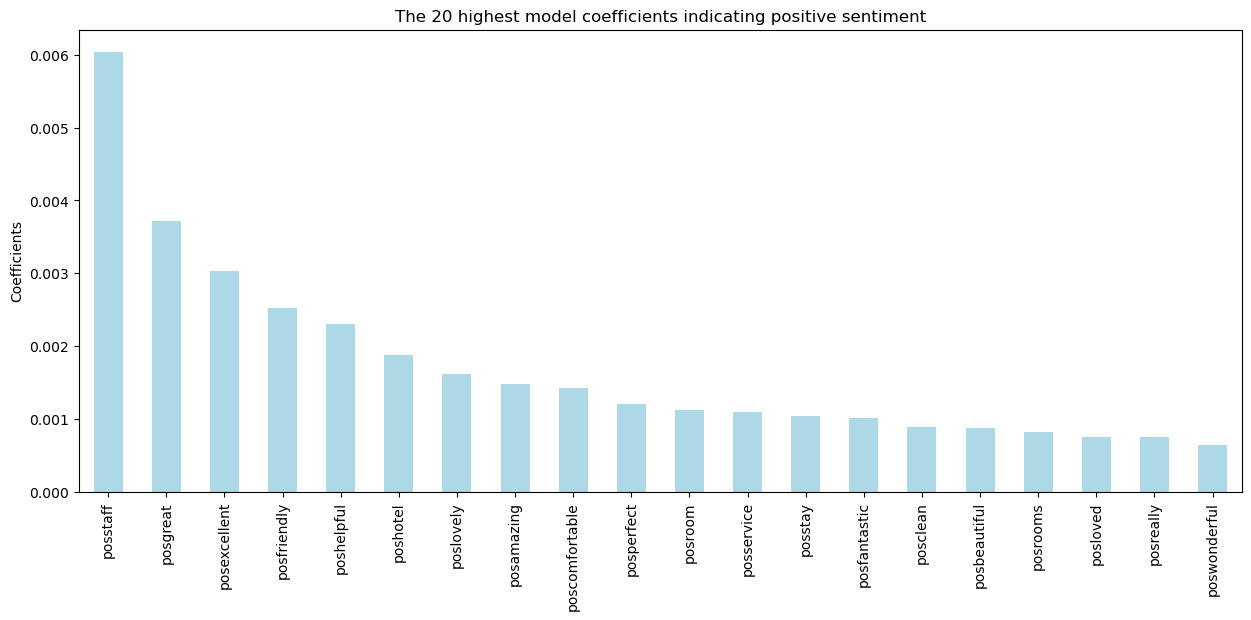

In [60]:
# 0 to see column, 1 the last, kinda like inverting sorting order
get_coef_pos = pd.Series(lr.coef_[0], 
                            index=save_test.columns).sort_values(ascending=False).filter(like='pos')

get_coef_pos.head(20).plot(kind="bar", figsize=(15, 6), color=(0.678, 0.847, 0.902), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

This bar chart displays the 20 highest model coefficients that indicate positive sentiment. Each bar represents the strength of association between a specific word/token and positive sentiment, as determined by a logistic regression model.

## Explanation:
- The x-axis shows different words or tokens found in the dataset, sorted in descending order based on their coefficient values.
- The y-axis represents the coefficients, which indicate the strength and direction of the relationship between each word/token and positive sentiment.
- A higher coefficient value indicates a stronger positive association with the sentiment being predicted.
- For example, if a word/token has a coefficient of 0.5, it means that for each unit increase in the frequency of that word/token, the log-odds of the sentiment being positive increases by 0.5 units.

In logistic regression:
- Coefficients represent the change in the log-odds of the dependent variable (in this case, sentiment) for a one-unit change in the independent variable (word/token frequency).
- Positive coefficients indicate a positive relationship, meaning an increase in the independent variable is associated with an increase in the log-odds of the dependent variable (positive sentiment in this case).
- The magnitude of the coefficient indicates the strength of the relationship. Larger coefficient values suggest a stronger association between the word/token and positive sentiment.

This visualization helps us understand which words/tokens are most strongly associated with positive sentiment in our dataset, providing insights into the factors influencing sentiment classification.


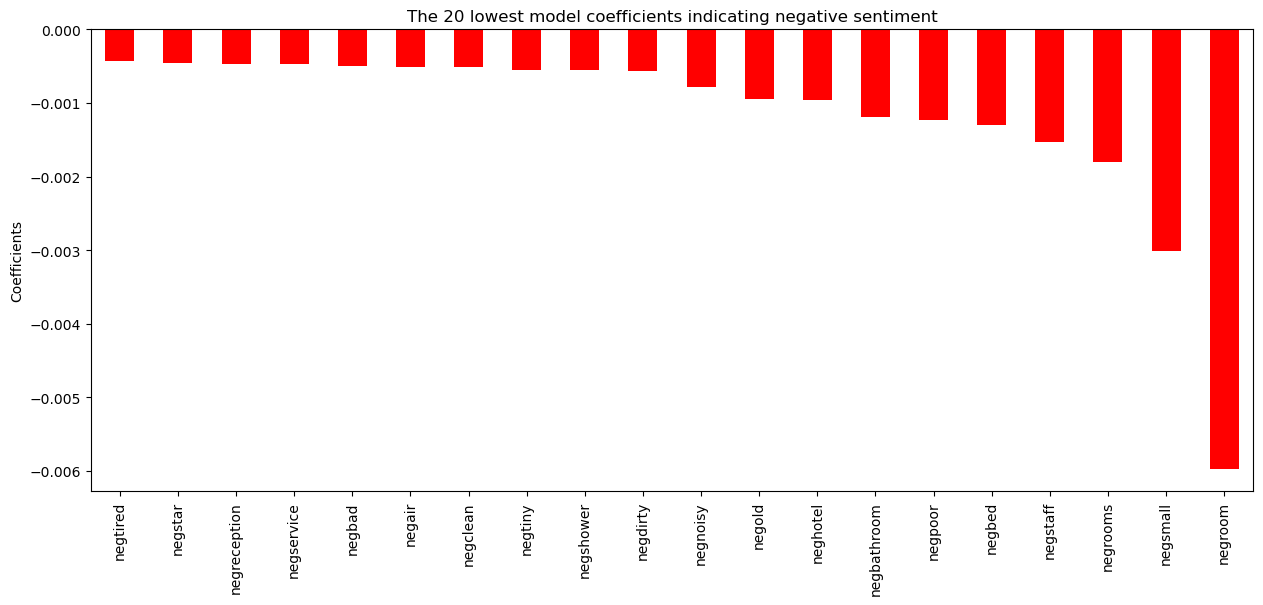

In [59]:
get_coef_neg = pd.Series(lr.coef_[0], 
                            index=save_test.columns).sort_values(ascending=False).filter(like='neg')

get_coef_neg.tail(20).plot(kind="bar", figsize=(15, 6), color='red', legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

This bar chart visualizes the 20 lowest model coefficients that indicate negative sentiment. Each bar represents the strength of association between a specific word/token and negative sentiment, as determined by a logistic regression model.

## Explanation:
- The x-axis displays different words or tokens found in the dataset, sorted in ascending order based on their coefficient values.
- The y-axis represents the coefficients, which indicate the strength and direction of the relationship between each word/token and negative sentiment.
- A lower coefficient value indicates a stronger negative association with the sentiment being predicted.
- For instance, if a word/token has a coefficient of -0.5, it means that for each unit increase in the frequency of that word/token, the log-odds of the sentiment being negative decreases by 0.5 units.

In logistic regression:
- Coefficients represent the change in the log-odds of the dependent variable (in this case, sentiment) for a one-unit change in the independent variable (word/token frequency).
- Negative coefficients indicate a negative relationship, meaning an increase in the independent variable is associated with a decrease in the log-odds of the dependent variable (negative sentiment in this case).
- The magnitude of the coefficient indicates the strength of the relationship. Larger negative coefficient values suggest a stronger association between the word/token and negative sentiment.

This visualization helps us understand which words/tokens are most strongly associated with negative sentiment in our dataset, providing insights into the factors influencing sentiment classification.

# Summary on Highest Model and Lowest Model Coefficients

In summary, after analyzing the top coefficients indicating positive and negative sentiment:

## Positive Sentiment:
- Words such as "Staff" are associated with higher positive coefficients, suggesting a strong positive relationship with sentiment. This means that mentions of "Staff" in reviews are likely to indicate positive experiences, contributing positively to sentiment classification.

## Negative Sentiment:
- Conversely, words like "room" are associated with lower negative coefficients, indicating a strong negative relationship with sentiment. This suggests that references to "room" in reviews are likely to indicate negative experiences, contributing negatively to sentiment classification.

These findings highlight specific words or tokens that significantly influence sentiment classification in our dataset. Recognizing these key associations enables us to better understand and interpret sentiment analysis results, providing valuable insights into the factors driving positive and negative sentiment in our data.


# 4. Pipeline, combine PCA with a decision tree classifier

## DECISION TREE

- Optimize at least 3 hyperparameters including the maximum tree depth and the minimum number of data points required on each leaf node.
- You can use 20 principle components.
- The best parameters should be found using 5-fold cross validation.
- Contrast the best results here with the logistic regression model and provide any insights that you may draw from the results.

To get the best score from a pipeline using GridSearchCV:

1. First, you create a pipeline, which is like a workflow that combines different steps of machine learning.
2. Then, you use GridSearchCV, which is a tool to search for the best combination of hyperparameters (settings) for your model.
3. After running GridSearchCV, you can access the best score using a simple command.

In [50]:
from sklearn.pipeline import Pipeline

# I give to my estimators as a list of tuples: name:function.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [52]:
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(n_components=20)),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

- Notes to comprehend more in detail the code below:
- `Max depth` in a decision tree is like setting a limit on how deep you can explore each path in a maze.
- `min_samples_leaf` sets the minimum number of samples required to be at a leaf node. **Analogy**: Imagine each leaf in a tree as a group of people who share similar characteristics.
- the minimum number of samples required to split an internal node further. **Analogy**: Picture the decision tree as a game where you decide whether to keep dividing a group based on how many players are left. `min_samples_split` sets the minimum number of players required to keep dividing a group into smaller groups.


In [53]:
param_grid = [{'model__max_depth': [4,6,8,16], # Options Yes or NO. setting a limit on how deep
               'model__min_samples_leaf':[1,5,10,20], # This is size of leaf, small the leaf we can have Overfitting. Note: There's no Regularizarion on Decision Tree.
               'model__min_samples_split':[2,10,50,100]} # This is also related to the size of leaf.
]

grid = GridSearchCV(pipe, param_grid, cv=5,verbose=20, n_jobs=2,
                    scoring="accuracy")

# n_jobs=4: This parameter tells the GridSearchCV to utilize 4 CPU cores for parallel execution

fittedgrid = grid.fit(save_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5; 1/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2
[CV 1/5; 1/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2;, score=0.736 total time= 1.0min
[CV 3/5; 1/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2
[CV 3/5; 1/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=2;, score=0.732 total time=  59.7s
[CV 1/5; 2/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=10
[CV 1/5; 2/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.736 total time= 1.1min
[CV 2/5; 2/64] START model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=10
[CV 2/5; 2/64] END model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.734 total time= 1.1min
[CV 5/5; 2/64] START model__max_depth=4, model__mi

# CPU Cores explanation (n_jobs=2)

- **Hardware Specs:** My MacBook M2 is equipped with 8 cores, comprising 4 Performance cores and 4 Efficiency cores (4 of each, 8 in total).

- **Issue Encountered:** Despite having 4 Performance cores, my computer experienced freezing and memory exhaustion errors, necessitating a restart. I tried 3 or 4 times, 4 trys and restarts.

- **Troubleshooting Steps:** Initially attempted running with `n_jobs=4` several times, but the issue persisted. Subsequently, I adjusted the configuration to utilize only 2 cores.

- **Utilization for Grid Search:** During the grid search process, either 2 or 4 CPU cores are utilized for parallel computation, potentially expediting the parameter tuning phase.



In [54]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=20)),
                ('model',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=50))])

In [73]:
# Best hyperparameters
fittedgrid.best_params_

{'model__max_depth': 8,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 50}

- On the output above there are the best Params on the ones I selected randomly:
- 8 for max depth,
- 1 for leaf and
- 50 for split

### Note:

In this project, let's visualize our parameters through a different lens, catering to non-technical audiences or visual learners. Imagine our parameters as elements of a maze-solving adventure, a journey that involves navigating through various levels of complexity.

- **Max Depth (Mazes):** Think of each maze as a challenge level. We set our maximum depth at 8, indicating the complexity and depth of the mazes our algorithm will navigate through.

- **Leaf (Group of People/Class):** Picture each leaf as a gathering of individuals or a class in our adventure. At each decision point within the maze, we arrive at a leaf where a group of people or a class of characters awaits our instructions.

- **Split (Group/Team Formation):** Now, imagine a scenario where we have 50 persons or players in each group or team. This represents our split, illustrating how our algorithm organizes individuals into distinct groups as it progresses through the mazes.

By visualizing our parameters in this manner, we can better understand how our algorithm navigates through the complexity of the data, much like adventurers exploring a series of challenging mazes, guiding groups of individuals to their destinations.


In [98]:
from IPython import display

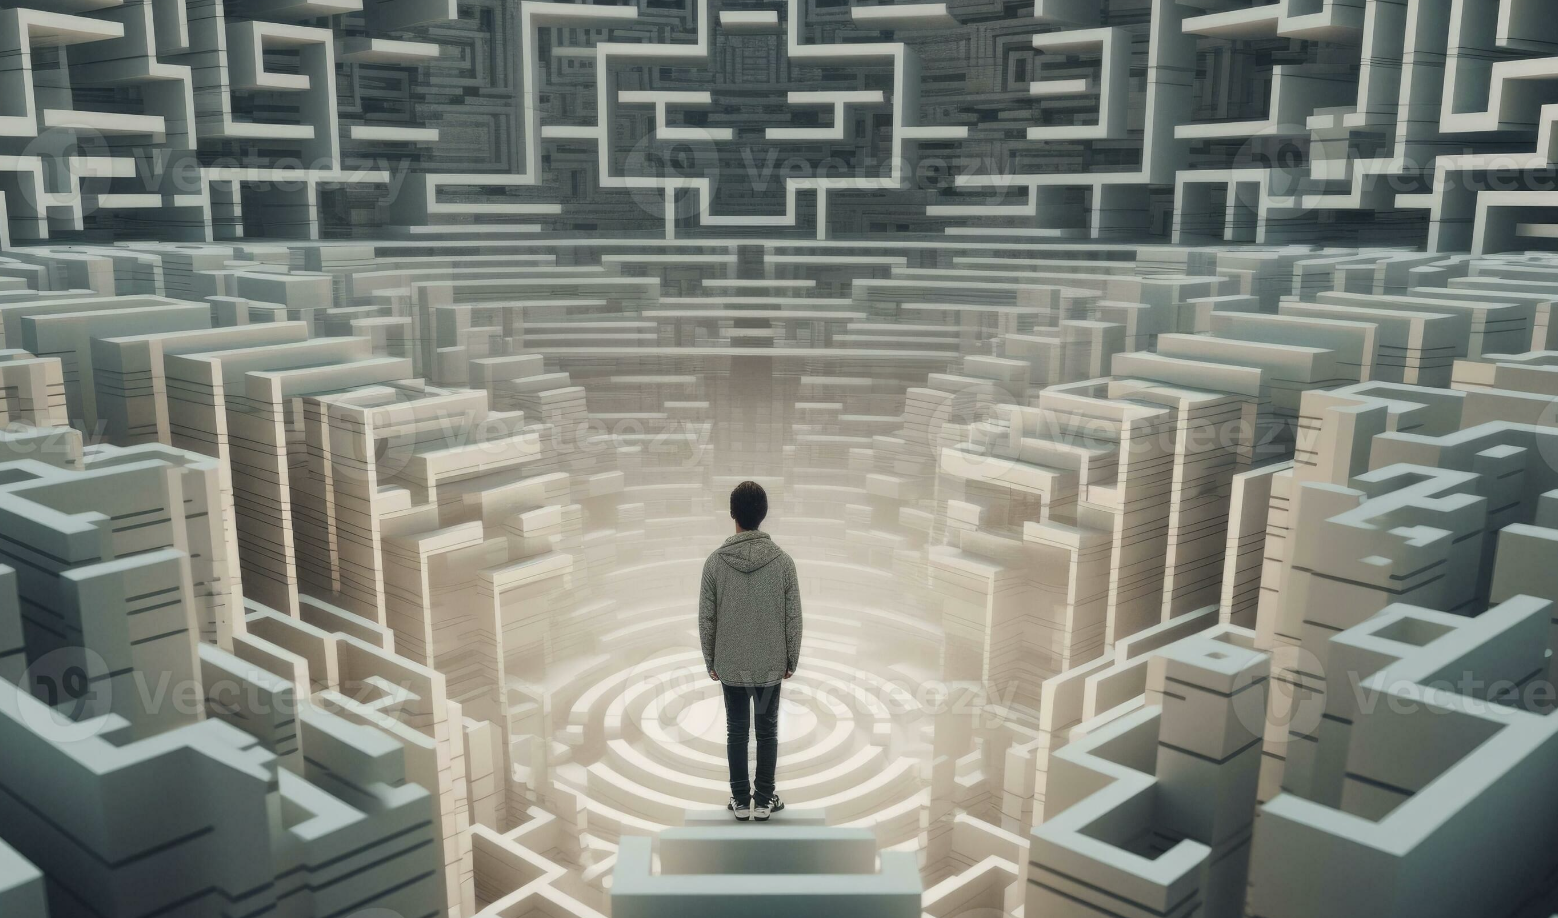

In [99]:
display.Image('mazeclassvic.png')

- Image above is a metaphorical approach for other typer of learners.
- This Markdown table employs a metaphorical approach, likening decision tree components to elements within a maze, aiming to provide a more vivid and engaging explanation.

| Element      | Maze Metaphor Explanation                                                                                              |
|--------------|------------------------------------------------------------------------------------------------------------------------|
| Max Depth    | Imagine the maze representing life's choices, where "Max Depth" limits how many twists and turns one takes before reaching a destination. |
| Leaf Nodes   | Picture arriving at specific spots within the maze where individuals gather based on their profession or identity, akin to reaching "Leaf Nodes" indicating belonging to a certain group (e.g., Lawyers or Doctors). |
| Splits       | Visualize diverging paths in the maze, each "Split" marking a point where groups of people separate based on shared characteristics, mirroring how decisions branch off in the maze. |


### Getting the best score from my pipeline using GridSearchCV

In [100]:
# Scoring from my pipeline using GridsearchCV
fittedgrid.score(save_test, y_test)

0.7520940784116027

# Comparing the scores from logistic regression and decision tree models

When comparing the scores from logistic regression and decision tree models, it's important to understand which score indicates better performance. In my case:

- For Logistic Regression:
  - Train score: 0.7126
  - Test score: 0.7101


- For the decision tree model:
  - Score: 0.7521

A higher score generally indicates better performance. In this scenario, the decision tree model has a higher score of 0.7521 compared to the logistic regression's test score of 0.7101.

This suggests that the decision tree model performs better in predicting outcomes compared to logistic regression in THIS SPECIFIC CASE.

The score represents the model's ACCURACY in making predictions. However, it's also essential to consider other factors such as model complexity, interpretability, and the specific requirements of your task when choosing the best model for your needs.


# Explaining Computational Expense and Model Performance

Model comparison between logistic regression and decision trees.

### Logistic Regression (Score: 0.71)

Think of logistic regression like taking the direct route to solve a puzzle. It's straightforward and doesn't require much thinking. We got a score of 0.71, which means our model performed decently, like solving the puzzle reasonably well with the straightforward path.

### Decision Trees (Score: 0.75)

Now, decision trees are like exploring many different paths through the puzzle. They can give us slightly better results, and in our case, we got a score of 0.75. It's like finding a slightly better solution by exploring various options in the puzzle.

### Computational Expense

But here's the catch: while decision trees might give us a slightly better score, they're computationally expensive. It's like exploring all those different paths in the puzzle takes a lot more time and effort. 

In our analysis, running the decision tree model took significantly more computational time compared to logistic regression. This means it's more demanding on our resources, like how exploring all those puzzle paths requires more brainpower and time.

### Conclusion

So, even though decision trees gave us a slightly better result, the trade-off was that it took a lot more time and computational resources. Sometimes, sticking with the simpler method (like logistic regression) is more efficient, especially if the difference in results isn't significant enough to justify the extra effort.

I hope this explanation helps clarify why we might prefer logistic regression despite its slightly lower score compared to decision trees.


# 5. CONFUSION MATRIX

## Model Evaluation

- For your best performing model, conduct a more in-depth evaluation by analyzing the confusion matrix and commenting on the model errors and metrics such as precision and recall.

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

- NEXT evaluate what’s best using recall, precision ETC in the one that performs the best. ONLY AT ONE, Logistic or Decision tree. 
To say what’s the best


- Name of my variables, just as reminder to do not scroll all the way up!
- save_train,  y_train
- save_test,   y_test

In [84]:
# Get class predictions
y_pred = fittedgrid.best_estimator_.predict(save_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted_Reviewer_Positive_Score", "Predicted_Reviewer_Negative_Score"],
    index=["True_Postive_Score", "True_Negative_Score"]
)

display(cf_df)

Predicted_Reviewer_Positive_Score  \
True_Postive_Score                               29828   
True_Negative_Score                              10949   

                     Predicted_Reviewer_Negative_Score  
True_Postive_Score                               14622  
True_Negative_Score                              47749

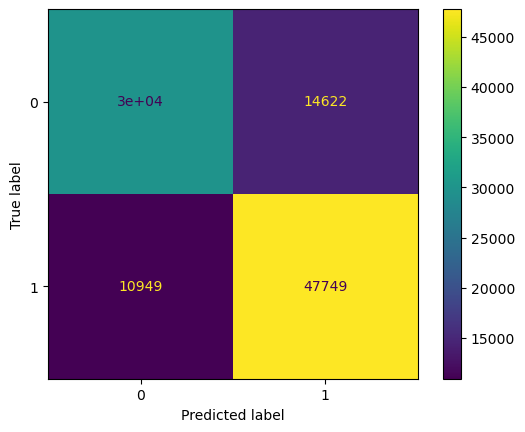

In [86]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(fittedgrid, save_test, y_test)

- False positive 14622
- False negative 10949
- True negative 3e+04 (To the power of 4)
- True positive 47749

# Explaining the visual above

### For good and bad reviews on hotels:

1. **False Positives (14,622):** These are cases where the Model predicted a hotel review to be Positive, but it was actually Negative. For example, the Model might have predicted that a hotel had great service when it actually didn't.

2. **False Negatives (10,949):** These are cases where the Model predicted a hotel review to be Negative, but it was actually Positive. For instance, the model might have thought a hotel had poor amenities when it actually had excellent ones.

3. **True Negatives (30,000):** These are cases where the Model correctly predicted a Negative review. For example, the model correctly predicted that a review complaining about cleanliness was indeed negative!

4. **True Positives (47,749):** These are cases where the Model correctly predicted a Positive review. For instance, the model correctly predicted that a review praising the hotel's location was indeed Positive!

The Confusion Matrix gives us a clear picture of how well our model is doing in terms of correctly identifying Positive (Good) and Negative (Bad) reviews on hotels. In this case, it seems like the Model is making a significant number of False Positive predictions... ! , which might require further investigation... or Fine-Tuning to improve its performance, especially if misclassifying Negative reviews as Positive could be costly or undesirable.

- Finally, the very handy classification_report function in sklearn.metrics will compute precision, recall, and f1-score for both the positive class and also the negative class.

In [92]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70     44450
           1       0.77      0.81      0.79     58698

    accuracy                           0.75    103148
   macro avg       0.75      0.74      0.74    103148
weighted avg       0.75      0.75      0.75    103148



- 1, Precision 0.77, Recall 0.81 and F1-Score 0.79
- The classifier is balance

- BrainStation, New York, NY, 
- March, 19, 2024


### Student: Victor Cornejo Leyva

### Linkedin: https://www.linkedin.com/in/victorcornejoo/

# THANK YOU FOR READING !!

And thanks to my teachers Paul and Laura to helped me with office hours!